In [2]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [3]:
import pandas as pd

In [4]:
# 단위 -> 일별로 정리
from datetime import datetime

def today(df):
  df = df.set_index('시간')
  df.index = pd.to_datetime(df.index)
  df = df.fillna(df.interpolate()) # 데이터 앞 뒤 평균으로 보간 
  df = df.resample(rule='D').mean()
  df.columns=['내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치', '펌프상태',
       '펌프작동남은시간', '펌프최근분무량', '펌프일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량']
  
  return df

In [5]:
# train_input 데이터 불러오기
for i in range(1, 58+1):
  i = str(i).zfill(2)
  df = pd.read_csv(f"/content/train_input/CASE_{i}.csv")
  globals()["df{}".format(i)] = today(df)

In [6]:
a = list()
for i in range(1, 58+1):
  i = str(i).zfill(2)
  b = 'df'+i
  a.append(b)

In [7]:
train_input_list = [df01,
 df02,
 df03,
 df04,
 df05,
 df06,
 df07,
 df08,
 df09,
 df10,
 df11,
 df12,
 df13,
 df14,
 df15,
 df16,
 df17,
 df18,
 df19,
 df20,
 df21,
 df22,
 df23,
 df24,
 df25,
 df26,
 df27,
 df28,
 df29,
 df30,
 df31,
 df32,
 df33,
 df34,
 df35,
 df36,
 df37,
 df38,
 df39,
 df40,
 df41,
 df42,
 df43,
 df44,
 df45,
 df46,
 df47,
 df48,
 df49,
 df50,
 df51,
 df52,
 df53,
 df54,
 df55,
 df56,
 df57,
 df58]

In [8]:
# train_input 데이터 합치기
train_input = pd.concat(train_input_list)

In [9]:
# 변화량 파악 어려운 맨 첫 행은 삭제
train_input.drop(train_input.index[0], inplace=True)

In [10]:
# 특성 - 타겟 인덱스 맞추기
train_miss = [28,57,84,113,142,171,200,229,276,318,358,391,424,469,514,558,583,625,653,679,705,
 731,757,783,809,846,879,921,956,989,1028,1055,1083,1111,1139,1165,1209,1231,1268,1305,1327,1349,1350]

In [11]:
train_input.reset_index(inplace=True)

In [12]:
train_input.drop(train_miss, inplace=True)

In [13]:
train_input

,시간,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,외부온도관측치,외부습도관측치,펌프상태,펌프작동남은시간,펌프최근분무량,...,카메라상태,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,2021-02-18,21.982326,32.574201,364.996528,0.907814,17.704792,11.069931,2.792708,1.646181,723.503986,...,0.837500,22.395833,20.395833,21.395833,0.000347,0.722436,0.000000,0.000000,0.000000,0.000000
1,2021-02-19,21.946354,32.688507,355.564931,0.906639,18.154305,14.419236,2.233333,1.276389,710.522104,...,0.837500,22.395836,20.395836,21.395836,0.005208,1.096539,0.000000,0.000000,0.000000,0.000000
2,2021-02-20,22.961979,26.747639,353.087500,0.909431,20.028958,20.384549,2.373958,1.461806,762.003958,...,0.697917,22.395838,20.395838,21.395838,0.000000,3.289385,0.000000,0.000000,0.000000,0.000000
3,2021-02-21,23.568576,41.969445,383.118056,0.910634,22.053889,22.203194,2.372917,1.382639,718.682319,...,0.697917,22.395820,20.395820,21.395820,0.000000,5.867981,0.000000,0.000000,0.000000,0.000000
4,2021-02-22,23.597535,61.533403,386.332292,0.910660,22.442500,26.325764,2.373958,1.418056,727.026604,...,0.697917,22.395555,20.395555,21.395555,0.000000,5.997571,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,2022-06-10,24.809583,64.427292,466.219097,0.011782,25.200001,41.500000,2.652083,1.145833,769.000000,...,0.139583,20.291637,17.416654,18.854145,0.158571,36.967261,179.526855,146.018959,12.375376,21.132520
1809,2022-06-11,24.573646,62.372172,496.510764,0.010869,25.200001,41.500000,2.791667,1.209722,769.000000,...,0.139583,20.291689,17.416702,18.854195,0.957158,35.950935,179.523769,146.042594,12.363884,21.117290
1810,2022-06-12,24.430587,61.645922,432.795139,0.009891,25.200001,41.500000,2.372917,1.143056,769.000000,...,0.139583,20.291813,17.416803,18.854308,0.899067,35.116692,179.494003,145.995323,12.375950,21.122730
1811,2022-06-13,24.339722,62.061215,502.240278,0.009580,25.200001,41.500000,2.233333,0.992361,769.000000,...,0.139583,20.291721,17.416742,18.854231,0.585540,34.609352,179.470777,145.969539,12.362735,21.138503


In [14]:
#train_index = train_input.index

In [15]:
#target_index = train_target.index

In [16]:
'''for i in range(0, 1812):
  if np.array(train_index)[i] == np.array(target_index)[i]:
    pass
  else:
    print(np.array(train_index)[i], np.array(target_index)[i], i)
'''

'for i in range(0, 1812):\n  if np.array(train_index)[i] == np.array(target_index)[i]:\n    pass\n  else:\n    print(np.array(train_index)[i], np.array(target_index)[i], i)\n'

In [17]:
# 드라이브에 저장
df.to_csv('/content/drive/MyDrive/Colab Notebooks/project02_train_input.csv')

In [18]:
#train_target 데이터 합치기
def today_target(df):
  df = df.set_index('시간')
  df.index = pd.to_datetime(df.index)
  return df

In [19]:
for i in range(1, 58+1):
  i = str(i).zfill(2)
  df = pd.read_csv(f"/content/train_target/CASE_{i}.csv")
  globals()["df_{}".format(i)] = today_target(df)

In [20]:
train_target_list = [df_01,
 df_02,
 df_03,
 df_04,
 df_05,
 df_06,
 df_07,
 df_08,
 df_09,
 df_10,
 df_11,
 df_12,
 df_13,
 df_14,
 df_15,
 df_16,
 df_17,
 df_18,
 df_19,
 df_20,
 df_21,
 df_22,
 df_23,
 df_24,
 df_25,
 df_26,
 df_27,
 df_28,
 df_29,
 df_30,
 df_31,
 df_32,
 df_33,
 df_34,
 df_35,
 df_36,
 df_37,
 df_38,
 df_39,
 df_40,
 df_41,
 df_42,
 df_43,
 df_44,
 df_45,
 df_46,
 df_47,
 df_48,
 df_49,
 df_50,
 df_51,
 df_52,
 df_53,
 df_54,
 df_55,
 df_56,
 df_57,
 df_58]

In [21]:
train_target = pd.concat(train_target_list)

In [22]:
train_target.drop(train_target.index[-1], inplace=True)

In [23]:
# 특성 - 타겟 인덱스 맞추기
target_miss = [28,57,84,113,142,171,200,229,276,318,358,391,424,469,514,558,583,625,653,679,705,
 731,757,783,809,846,879,921,956,989,1028,1055,1083,1111,1139,1165,1209,1231,1268,1305,1327,1349]

In [24]:
train_target.reset_index(inplace=True)

In [25]:
train_target.drop(target_miss, inplace=True)

In [26]:
train_target.drop('시간', axis=1, inplace=True)

In [27]:
train_target.to_csv('/content/drive/MyDrive/Colab Notebooks/project02_train_target.csv')

In [28]:
''' feature engineering -> '외부온도관측치', '외부습도관측치', '카메라상태', '외부환기팬상태', '외부환기팬작동남은시간'
-> 내부와 관련없는 특성 삭제 '''
train_input.columns

Index(['시간', '내부온도관측치', '내부습도관측치', 'CO2관측치', 'EC관측치', '외부온도관측치', '외부습도관측치',
       '펌프상태', '펌프작동남은시간', '펌프최근분무량', '펌프일간누적분무량', '냉방상태', '냉방작동남은시간', '난방상태',
       '난방작동남은시간', '내부유동팬상태', '내부유동팬작동남은시간', '외부환기팬상태', '외부환기팬작동남은시간',
       '화이트 LED상태', '화이트 LED작동남은시간', '화이트 LED동작강도', '레드 LED상태', '레드 LED작동남은시간',
       '레드 LED동작강도', '블루 LED상태', '블루 LED작동남은시간', '블루 LED동작강도', '카메라상태', '냉방온도',
       '난방온도', '기준온도', '난방부하', '냉방부하', '총추정광량', '백색광추정광량', '적색광추정광량',
       '청색광추정광량'],
      dtype='object')

In [29]:
def fe(df):
  df.drop(['시간', '외부온도관측치', '외부습도관측치', '카메라상태', '외부환기팬상태', '외부환기팬작동남은시간'], axis=1, inplace=True)
  return df

fe(train_input)

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,펌프상태,펌프작동남은시간,펌프최근분무량,펌프일간누적분무량,냉방상태,냉방작동남은시간,...,블루 LED동작강도,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,21.982326,32.574201,364.996528,0.907814,2.792708,1.646181,723.503986,6618.845910,22.193750,13.502083,...,5.851042,22.395833,20.395833,21.395833,0.000347,0.722436,0.000000,0.000000,0.000000,0.000000
1,21.946354,32.688507,355.564931,0.906639,2.233333,1.276389,710.522104,5784.703549,29.313194,18.677083,...,5.848958,22.395836,20.395836,21.395836,0.005208,1.096539,0.000000,0.000000,0.000000,0.000000
2,22.961979,26.747639,353.087500,0.909431,2.373958,1.461806,762.003958,6155.385611,84.729514,55.420139,...,5.852778,22.395838,20.395838,21.395838,0.000000,3.289385,0.000000,0.000000,0.000000,0.000000
3,23.568576,41.969445,383.118056,0.910634,2.372917,1.382639,718.682319,5858.030889,162.195833,100.845833,...,5.851042,22.395820,20.395820,21.395820,0.000000,5.867981,0.000000,0.000000,0.000000,0.000000
4,23.597535,61.533403,386.332292,0.910660,2.373958,1.418056,727.026604,6389.430007,168.895833,101.290972,...,5.870139,22.395555,20.395555,21.395555,0.000000,5.997571,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,24.809583,64.427292,466.219097,0.011782,2.652083,1.145833,769.000000,6650.247917,200.861111,3567.455556,...,13.490972,20.291637,17.416654,18.854145,0.158571,36.967261,179.526855,146.018959,12.375376,21.132520
1809,24.573646,62.372172,496.510764,0.010869,2.791667,1.209722,769.000000,6647.043750,194.300000,3447.838194,...,13.483333,20.291689,17.416702,18.854195,0.957158,35.950935,179.523769,146.042594,12.363884,21.117290
1810,24.430587,61.645922,432.795139,0.009891,2.372917,1.143056,769.000000,6655.321181,197.511806,3510.926389,...,13.482639,20.291813,17.416803,18.854308,0.899067,35.116692,179.494003,145.995323,12.375950,21.122730
1811,24.339722,62.061215,502.240278,0.009580,2.233333,0.992361,769.000000,6648.111806,199.465278,3541.763889,...,13.495139,20.291721,17.416742,18.854231,0.585540,34.609352,179.470777,145.969539,12.362735,21.138503


In [30]:
# 데이터 전처리
train_input.isnull().sum() # 결측치 확인

내부온도관측치          0
내부습도관측치          0
CO2관측치           0
EC관측치            0
펌프상태             0
펌프작동남은시간         0
펌프최근분무량          0
펌프일간누적분무량        0
냉방상태             0
냉방작동남은시간         0
난방상태             0
난방작동남은시간         0
내부유동팬상태          0
내부유동팬작동남은시간      0
화이트 LED상태        0
화이트 LED작동남은시간    0
화이트 LED동작강도      0
레드 LED상태         0
레드 LED작동남은시간     0
레드 LED동작강도       0
블루 LED상태         0
블루 LED작동남은시간     0
블루 LED동작강도       0
냉방온도             0
난방온도             0
기준온도             0
난방부하             0
냉방부하             0
총추정광량            0
백색광추정광량          0
적색광추정광량          0
청색광추정광량          0
dtype: int64

In [31]:
train_input.describe()

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,펌프상태,펌프작동남은시간,펌프최근분무량,펌프일간누적분무량,냉방상태,냉방작동남은시간,...,블루 LED동작강도,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
count,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1.770000e+03,1.770000e+03,1.770000e+03,...,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000,1770.000000
mean,24.485932,70.514159,501.800195,6.099706,3.661882,9.652755,997.161614,7.795386e+03,1.126650e+05,1.015496e+05,...,14.436933,21.632303,19.497384,20.378697,1.522259,24.993421,186.545885,139.045775,23.837876,22.918051
std,2.868219,133.374474,97.664669,93.410733,8.296886,217.527479,10903.511824,4.770967e+04,2.501550e+06,3.480544e+06,...,20.465287,2.840789,3.534903,3.627869,4.378310,22.809287,90.340318,68.981652,29.601518,32.106441
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.033733,57.875365,441.501562,0.587125,2.096528,0.488281,119.885323,1.805904e+03,1.049148e+02,9.015026e+01,...,0.000000,20.291590,17.416631,18.854144,0.000000,10.997420,147.963783,143.294432,0.000000,0.000000
50%,24.553472,69.785811,483.240625,1.364860,2.512500,1.097396,587.232660,4.502259e+03,1.608701e+02,1.102906e+02,...,12.250000,23.273963,20.395860,21.499999,0.011333,19.749845,179.463161,146.032925,12.385718,19.224164
75%,26.143728,78.176302,537.020920,2.215210,3.210417,1.367448,724.245411,6.109522e+03,1.949646e+02,2.692759e+03,...,13.488194,23.499828,22.395896,22.895896,1.251323,34.161028,184.199402,151.736598,23.682170,21.131432
max,33.638611,5631.125335,1164.385417,2516.551197,123.461458,9111.439583,352192.265257,1.199817e+06,7.148964e+07,1.420827e+08,...,91.734722,27.584720,25.000000,25.500000,35.436274,179.605092,518.955509,309.410000,165.480000,143.794909


In [32]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_input_scaled = scaler.fit_transform(train_input)

In [33]:
train_input_scaled = pd.DataFrame(train_input_scaled, columns=train_input.columns)
train_input_scaled

,내부온도관측치,내부습도관측치,CO2관측치,EC관측치,펌프상태,펌프작동남은시간,펌프최근분무량,펌프일간누적분무량,냉방상태,냉방작동남은시간,...,블루 LED동작강도,냉방온도,난방온도,기준온도,난방부하,냉방부하,총추정광량,백색광추정광량,적색광추정광량,청색광추정광량
0,-0.873125,-0.284542,-1.401145,-0.055597,-0.104789,-0.036818,-0.025105,-0.024667,-0.045042,-0.029181,...,-0.419653,0.268850,0.254237,0.280447,-0.347701,-1.064384,-2.065507,-2.016262,-0.805520,-0.714016
1,-0.885670,-0.283685,-1.497743,-0.055610,-0.172228,-0.038518,-0.026296,-0.042156,-0.045039,-0.029179,...,-0.419755,0.268851,0.254238,0.280447,-0.346590,-1.047978,-2.065507,-2.016262,-0.805520,-0.714016
2,-0.531474,-0.328240,-1.523117,-0.055580,-0.155274,-0.037665,-0.021573,-0.034384,-0.045017,-0.029169,...,-0.419568,0.268852,0.254238,0.280448,-0.347780,-0.951813,-2.065507,-2.016262,-0.805520,-0.714016
3,-0.319925,-0.214080,-1.215544,-0.055567,-0.155399,-0.038029,-0.025548,-0.040619,-0.044986,-0.029156,...,-0.419653,0.268845,0.254233,0.280443,-0.347780,-0.838731,-2.065507,-2.016262,-0.805520,-0.714016
4,-0.309826,-0.067354,-1.182624,-0.055567,-0.155274,-0.037867,-0.024782,-0.029477,-0.044983,-0.029155,...,-0.418720,0.268752,0.254158,0.280370,-0.347780,-0.833047,-2.065507,-2.016262,-0.805520,-0.714016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1765,0.112872,-0.045650,-0.364422,-0.065192,-0.121743,-0.039118,-0.020931,-0.024009,-0.044970,-0.028159,...,-0.046236,-0.472068,-0.588791,-0.420352,-0.311552,0.525103,-0.077717,0.101116,-0.387336,-0.055629
1766,0.030590,-0.061063,-0.054174,-0.065202,-0.104914,-0.038825,-0.020931,-0.024076,-0.044973,-0.028194,...,-0.046609,-0.472049,-0.588777,-0.420338,-0.129105,0.480533,-0.077752,0.101459,-0.387725,-0.056103
1767,-0.019302,-0.066510,-0.706751,-0.065212,-0.155399,-0.039131,-0.020931,-0.023903,-0.044972,-0.028176,...,-0.046643,-0.472006,-0.588749,-0.420307,-0.142376,0.443948,-0.078081,0.100773,-0.387317,-0.055934
1768,-0.050990,-0.063395,0.004507,-0.065216,-0.172228,-0.039824,-0.020931,-0.024054,-0.044971,-0.028167,...,-0.046032,-0.472038,-0.588766,-0.420329,-0.214006,0.421699,-0.078338,0.100399,-0.387763,-0.055442


In [34]:
# RMSE -> 실제적이면서도 이상치에 대해 민감한 부분이 있어서 이상치에 대한 손실을 잘 파악할 수 있다.

In [35]:
# 기준모델
from sklearn.metrics import mean_squared_error
import numpy as np

baseline = [train_target.mean()] * len(train_target)
baseline_mse = mean_squared_error(train_target, baseline)
baseline_rmse = np.sqrt(baseline_mse)

print(f'기준모델의 rmse : {baseline_rmse}')

기준모델의 rmse : 1.5638221823416123


In [36]:
# 선형 회귀 모델
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_input_scaled, train_target)


LinearRegression()

In [37]:
# 회귀 계수 확인
model.coef_

array([[-9.46818905e-02, -2.56560846e-02,  8.65940717e-02,
         2.03103615e-02, -3.07426997e-02, -1.93157270e-02,
         1.17148944e-02, -3.32314784e-03,  1.45938640e-03,
         2.27587885e-03, -3.18195663e-03, -1.00050507e-02,
        -4.29575500e-02,  1.92815572e-02,  8.35820064e+03,
         2.89536869e-03,  9.16153675e-02, -8.35820420e+03,
        -8.15361710e-03,  6.74588017e-02, -6.19863189e-03,
         1.63664191e-03,  3.86609659e-01, -1.82605696e-01,
         1.38943860e-02,  2.95622631e-01,  4.74616282e-03,
         1.31002143e-01, -5.77927170e-01,  4.48627399e-01,
         2.01127793e-01, -1.38218578e-01]])

In [38]:
model_co = [-9.46818905e-02, -2.56560846e-02,  8.65940717e-02,
         2.03103615e-02, -3.07426997e-02, -1.93157270e-02,
         1.17148944e-02, -3.32314784e-03,  1.45938640e-03,
         2.27587885e-03, -3.18195663e-03, -1.00050507e-02,
        -4.29575500e-02,  1.92815572e-02,  8.35820064e+03,
         2.89536869e-03,  9.16153675e-02, -8.35820420e+03,
        -8.15361710e-03,  6.74588017e-02, -6.19863189e-03,
         1.63664191e-03,  3.86609659e-01, -1.82605696e-01,
         1.38943860e-02,  2.95622631e-01,  4.74616282e-03,
         1.31002143e-01, -5.77927170e-01,  4.48627399e-01,
         2.01127793e-01, -1.38218578e-01]

In [39]:
model_coef = pd.Series(model_co, model.feature_names_in_)
model_coef.sort_values(ascending=False)

화이트 LED상태        8358.200640
백색광추정광량             0.448627
블루 LED동작강도          0.386610
기준온도                0.295623
적색광추정광량             0.201128
냉방부하                0.131002
화이트 LED동작강도         0.091615
CO2관측치              0.086594
레드 LED동작강도          0.067459
EC관측치               0.020310
내부유동팬작동남은시간         0.019282
난방온도                0.013894
펌프최근분무량             0.011715
난방부하                0.004746
화이트 LED작동남은시간       0.002895
냉방작동남은시간            0.002276
블루 LED작동남은시간        0.001637
냉방상태                0.001459
난방상태               -0.003182
펌프일간누적분무량          -0.003323
블루 LED상태           -0.006199
레드 LED작동남은시간       -0.008154
난방작동남은시간           -0.010005
펌프작동남은시간           -0.019316
내부습도관측치            -0.025656
펌프상태               -0.030743
내부유동팬상태            -0.042958
내부온도관측치            -0.094682
청색광추정광량            -0.138219
냉방온도               -0.182606
총추정광량              -0.577927
레드 LED상태        -8358.204200
dtype: float64

In [40]:
# Cross-validation

from sklearn.model_selection import cross_val_score

cv_results = cross_val_score(
    model, 
    train_input_scaled, 
    train_target, 
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
    )

rmse = np.sqrt(-1 * cv_results)
print('rmse for each fold : ', rmse)
print('average rmse for model : ', (sum(rmse) - max(rmse) - min(rmse)) / (len(rmse)-2))
print('std of result : ', np.std(cv_results).round(2))

rmse for each fold :  [1.69993329e+02 6.88277120e-01 1.39700357e+05 1.58126006e+01
 1.15645157e+04]
average rmse for model :  3916.7738645745444
std of result :  7793271288.2


In [41]:
# Ridge -> 최종 선택 모델
from sklearn.linear_model import RidgeCV

alphas = np.arange(1, 100, 10)
ridge = RidgeCV(alphas=alphas, cv=5, scoring=None)
ridge.fit(train_input_scaled, train_target)

print("alpha: ", ridge.alpha_)

alpha:  91


In [42]:
cv_ridge = cross_val_score(
    ridge, 
    train_input_scaled, 
    train_target, 
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
    )

rmse = np.sqrt(-1 * cv_ridge)
print('rmse for each fold : ', rmse)
print('average rmse for model : ', (sum(rmse) - max(rmse) - min(rmse)) / (len(rmse)-2))
print('std of result : ', np.std(cv_ridge).round(2))

rmse for each fold :  [0.34451865 0.34900049 3.15255639 1.10365348 1.11725374]
average rmse for model :  0.8566359048775566
std of result :  3.74


In [43]:
ridge.coef_

array([[ 0.00208513, -0.02457555,  0.06921304,  0.01348108, -0.03411588,
        -0.01744217,  0.00851648, -0.00054919, -0.00377882,  0.00391483,
        -0.01531202,  0.01005536, -0.02310549,  0.00795994,  0.00018065,
         0.00199026,  0.03599755,  0.0001708 , -0.00625693, -0.00098771,
        -0.00843252,  0.00208499,  0.06083651, -0.07161183, -0.00542911,
         0.04873599, -0.00320402, -0.018716  ,  0.00856037,  0.01435447,
         0.03044232,  0.00081971]])

In [44]:
ridge_co = [ 0.00208513, -0.02457555,  0.06921304,  0.01348108, -0.03411588,
        -0.01744217,  0.00851648, -0.00054919, -0.00377882,  0.00391483,
        -0.01531202,  0.01005536, -0.02310549,  0.00795994,  0.00018065,
         0.00199026,  0.03599755,  0.0001708 , -0.00625693, -0.00098771,
        -0.00843252,  0.00208499,  0.06083651, -0.07161183, -0.00542911,
         0.04873599, -0.00320402, -0.018716  ,  0.00856037,  0.01435447,
         0.03044232,  0.00081971]

In [45]:
ridge_coef = pd.Series(ridge_co, ridge.feature_names_in_)
ridge_coef.sort_values(ascending=False)

CO2관측치           0.069213
블루 LED동작강도       0.060837
기준온도             0.048736
화이트 LED동작강도      0.035998
적색광추정광량          0.030442
백색광추정광량          0.014354
EC관측치            0.013481
난방작동남은시간         0.010055
총추정광량            0.008560
펌프최근분무량          0.008516
내부유동팬작동남은시간      0.007960
냉방작동남은시간         0.003915
내부온도관측치          0.002085
블루 LED작동남은시간     0.002085
화이트 LED작동남은시간    0.001990
청색광추정광량          0.000820
화이트 LED상태        0.000181
레드 LED상태         0.000171
펌프일간누적분무량       -0.000549
레드 LED동작강도      -0.000988
난방부하            -0.003204
냉방상태            -0.003779
난방온도            -0.005429
레드 LED작동남은시간    -0.006257
블루 LED상태        -0.008433
난방상태            -0.015312
펌프작동남은시간        -0.017442
냉방부하            -0.018716
내부유동팬상태         -0.023105
내부습도관측치         -0.024576
펌프상태            -0.034116
냉방온도            -0.071612
dtype: float64

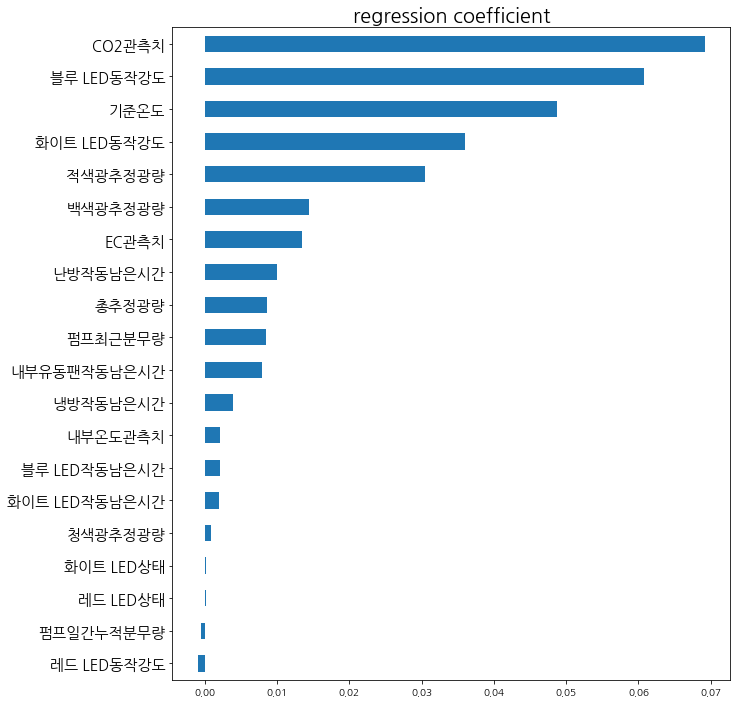

In [62]:
# 회귀계수 시각화
import matplotlib.pyplot as plt

ridge_coef.sort_values().tail(20).plot.barh(figsize=(10, 12))
plt.title("regression coefficient", fontsize=20)
plt.rc('ytick', labelsize=13) 
plt.show()

In [47]:
# XGBoost

import xgboost as xgb

xgbr = xgb.XGBRegressor(
    objective ='reg:linear',
    eval_metric="rmse",
    learning_rate=0.05,
    max_depth=6,
    n_estimators=100
    )
xgbr.fit(train_input_scaled, train_target)

[05:07:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse', learning_rate=0.05, max_depth=6)

In [48]:
from scipy.stats.distributions import uniform

params = {
    "xgbregressor__max_depth": [2, 4, 6],
    "xgbregressor__min_child_weight": [2, 4, 8],
    "xgbregressor__colsample_bytree": uniform(
        loc=0.5, scale=0.5
    ),
}

In [49]:
from sklearn.model_selection import RandomizedSearchCV

randomized_search = RandomizedSearchCV(
    xgbr,
    param_distributions=params,
    scoring="neg_root_mean_squared_error",
    n_iter=10,
    cv=3,
    verbose=3,
    random_state=42,
)
randomized_search.fit(train_input_scaled, train_target)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[05:07:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 1/3] END xgbregressor__colsample_bytree=0.6872700594236812, xgbregressor__max_depth=2, xgbregressor__min_child_weight=8;, score=-1.079 total time=   0.4s
[05:07:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 2/3] END xgbregressor__colsample_bytree=0.6872700594236812, xgbregressor__max_depth=2, xgbregressor__min_child_weight=8;, score=-2.455 total time=   0.4s
[05:07:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV 3/3] END xgbregressor__colsample_bytree=0.6872700594236812, xgbregressor__max_depth=2, xgbregressor__min_child_weight=8;, score=-2.169 total time=   0.3s
[05:07:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is no

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(eval_metric='rmse',
                                          learning_rate=0.05, max_depth=6),
                   param_distributions={'xgbregressor__colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f24488d6650>,
                                        'xgbregressor__max_depth': [2, 4, 6],
                                        'xgbregressor__min_child_weight': [2, 4,
                                                                           8]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=3)

In [50]:
print("최적 하이퍼파라미터: ", randomized_search.best_params_)
print("최적 rmse: ", -randomized_search.best_score_)

최적 하이퍼파라미터:  {'xgbregressor__colsample_bytree': 0.6872700594236812, 'xgbregressor__max_depth': 2, 'xgbregressor__min_child_weight': 8}
최적 rmse:  1.9009676878372037


In [51]:
# 최적 하이퍼파라미터를 바탕으로 한 모델링 -> 회귀계수 파악을 위함
xgbr_re = xgb.XGBRegressor(
    objective ='reg:linear',
    eval_metric="rmse",
    learning_rate=0.05,
    max_depth=2,
    n_estimators=100,
    colsample_bytree= 0.6872700594236812,
    min_child_weight= 8
    )
xgbr_re.fit(train_input_scaled, train_target)

[05:07:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.6872700594236812, eval_metric='rmse',
             learning_rate=0.05, max_depth=2, min_child_weight=8)

In [52]:
xgbr_inportance = pd.Series(xgbr_re.feature_importances_, train_input_scaled.columns)
xgbr_inportance.sort_values(ascending=False)

냉방상태             0.119675
냉방작동남은시간         0.105259
펌프일간누적분무량        0.091624
블루 LED동작강도       0.060990
화이트 LED작동남은시간    0.058545
내부온도관측치          0.057282
EC관측치            0.056533
펌프상태             0.055618
펌프최근분무량          0.054597
냉방부하             0.045533
기준온도             0.042806
내부습도관측치          0.040735
블루 LED작동남은시간     0.039628
청색광추정광량          0.038158
레드 LED상태         0.035353
냉방온도             0.028762
총추정광량            0.023946
CO2관측치           0.018704
블루 LED상태         0.005518
난방부하             0.005442
화이트 LED상태        0.004646
화이트 LED동작강도      0.004018
펌프작동남은시간         0.003859
난방온도             0.002769
난방작동남은시간         0.000000
난방상태             0.000000
내부유동팬작동남은시간      0.000000
레드 LED동작강도       0.000000
레드 LED작동남은시간     0.000000
내부유동팬상태          0.000000
백색광추정광량          0.000000
적색광추정광량          0.000000
dtype: float32